# Week4 - Homework

- Execute the below code, then answer the numbered questions.
- You can create additinal code and markdown blocks

In [19]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/airbnb_nyc_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Question 1:
### Which features can we use?

In [20]:
# analysis code
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [21]:
df.shape

(48895, 16)

In [22]:
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [23]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#check for missing values

print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


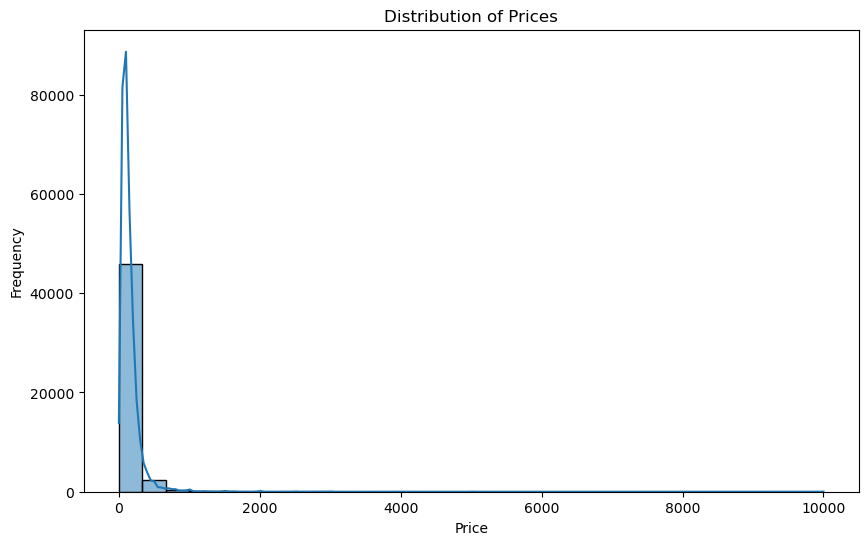

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

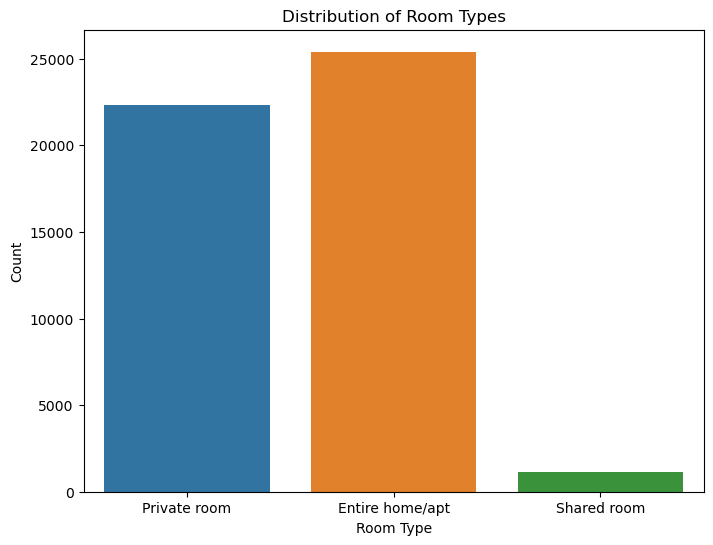

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

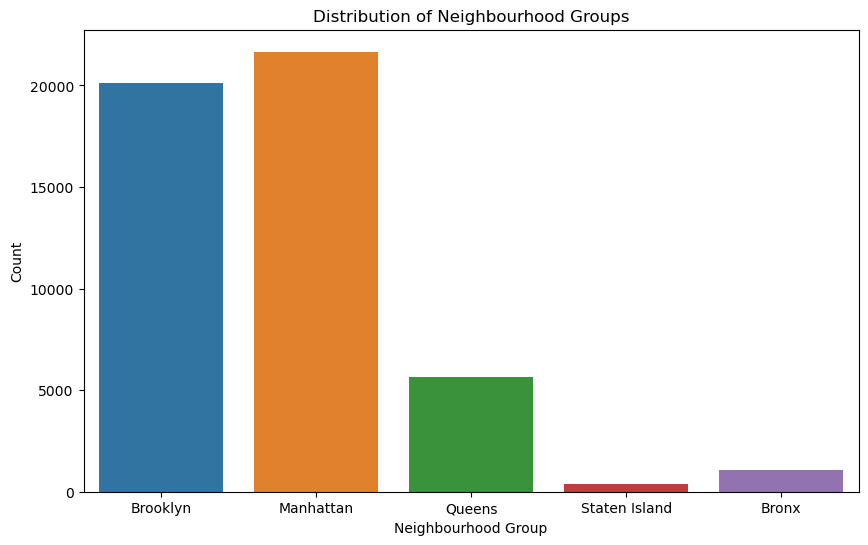

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Distribution of Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()


Your explanation?

In [12]:
#The shape of the data is 48895, 16
#The plots show the price difference between shared room, entire house and the private room
# Manhattan has nore housing options in NYC, with the least one being the Staten Island.

In [13]:
from sklearn.model_selection import train_test_split
features = [
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 39,116
Records in test data: 9,779

Features:
neighbourhood_group
room_type
latitude
longitude
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


## Question 2: 
Split the features into two lists, one for the numerical features and another for the categorical features.

In [25]:
df=df.drop(columns=['id', 'name', 'host_id', 'host_name','price'])

In [26]:
# insert code here

# Selecting numerical and categorical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Print the lists
print("Numerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)


Numerical Features:
['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Categorical Features:
['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


## Question 3: 
 Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [27]:
# insert code here

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with the median
    ('scaler', StandardScaler())  # Standardize the numerical features
])

# Create a column transformer to apply the pipeline to the numerical features
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features)
    ]
)

# Apply the pipeline to your dataset
X_processed = preprocessor1.fit_transform(df[numerical_features])

print(preprocessor1)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['latitude', 'longitude', 'minimum_nights',
                                  'number_of_reviews', 'reviews_per_month',
                                  'calculated_host_listings_count',
                                  'availability_365'])])


## Question 4: 
Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [28]:
# insert code here

from sklearn.preprocessing import OneHotEncoder

# Define categorical features
categorical_features = [
    'neighbourhood_group',
    'room_type'
]

# Create a pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with the most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # One-hot encoding with dropping one category
])

# Create a column transformer to apply the pipeline to the categorical features
preprocessor_categorical = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Apply the pipeline to your dataset
X_categorical_processed = preprocessor_categorical.fit_transform(df[categorical_features])

# Print the transformed dataset
print(X_categorical_processed)

# Fit transformer on the training dataset to validate all columns are numeric and check the number of columns
X_categorical_train = preprocessor_categorical.fit_transform(df.loc[X_train.index, categorical_features])

# Print the transformed training dataset
print(X_categorical_train)

# Check the number of columns in the transformed data
print(f"Number of columns after transformation: {X_categorical_train.shape[1]}")


  (0, 0)	1.0
  (0, 4)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (2, 4)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (6, 4)	1.0
  (7, 1)	1.0
  (7, 4)	1.0
  (8, 1)	1.0
  (8, 4)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (11, 4)	1.0
  (12, 0)	1.0
  (12, 4)	1.0
  (13, 1)	1.0
  (13, 4)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  :	:
  (48881, 0)	1.0
  (48881, 4)	1.0
  (48882, 0)	1.0
  (48882, 4)	1.0
  (48883, 1)	1.0
  (48883, 4)	1.0
  (48884, 0)	1.0
  (48884, 4)	1.0
  (48885, 1)	1.0
  (48885, 4)	1.0
  (48886, 1)	1.0
  (48887, 0)	1.0
  (48888, 1)	1.0
  (48888, 4)	1.0
  (48889, 2)	1.0
  (48889, 4)	1.0
  (48890, 0)	1.0
  (48890, 4)	1.0
  (48891, 0)	1.0
  (48891, 4)	1.0
  (48892, 1)	1.0
  (48893, 1)	1.0
  (48893, 5)	1.0
  (48894, 1)	1.0
  (48894, 4)	1.0
  (0, 1)	1.0
  (1, 0)	1.0
  (1, 5)	1.0
  (2, 1)	1.0
  (2, 5)	1.0
  (3, 0)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 0)	1.0
  (7, 4)	1.0
  (8, 0)	1.0
  (8, 4)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (10, 5)	1.0
  (12, 1)	1

## Question 5: 

Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [29]:
# insert code here

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Apply the combined pipeline to the training dataset
X_train_processed = preprocessor.fit_transform(df.loc[X_train.index, numerical_features + categorical_features])

# Check if there are any missing values
print("Missing values in processed data:", pd.DataFrame(X_train_processed).isnull().sum().sum())

# Check the number of columns after transformation
print("Number of columns after transformation:", X_train_processed.shape[1])

Missing values in processed data: 0
Number of columns after transformation: 13


## Question 6: 

Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model using R^2 on the test data
r2 = r2_score(y_test, y_pred)

print(f'R^2 on the test data: {r2:.4f}')

R^2 on the test data: 0.0916


## Question 7: 

Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

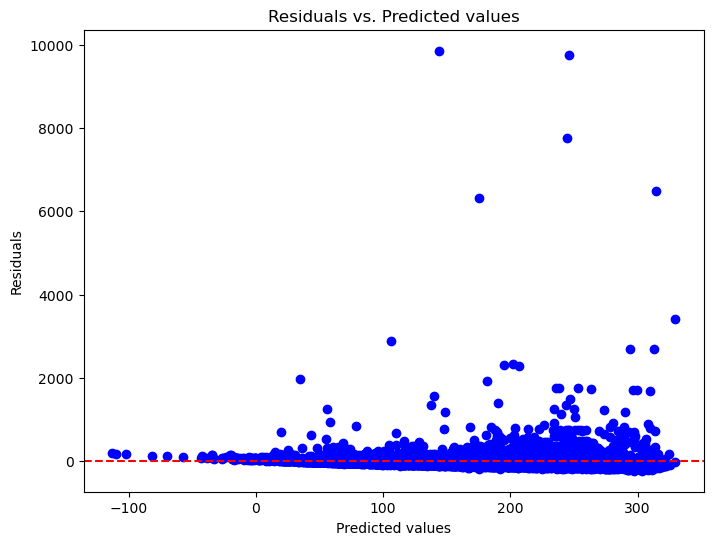

In [31]:
# insert code here
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted values')
plt.show()

the residulas are close to zero but there are many outliers

Insert description here.

## Question 8: 

Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [33]:
from sklearn.linear_model import Ridge

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=100))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'R^2 on the test data: {r2:.4f}')

R^2 on the test data: 0.0910


the r^2 didn't really change compared to the previous value